In [1]:
## genenrate bounding box using google genai

In [2]:
from mb_annotation.bounding_box import google_model,generate_bounding_box,add_bounding_box
from mb_annotation.utils import load_env_file

/home/malav/.local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import os
load_env_file('./env');

In [4]:
model = google_model(model="gemini-1.5-pro-latest",api_key=os.environ.get("GOOGLE_API_KEY"))

In [5]:
res =generate_bounding_box(model,image_path="/home/malav/Downloads/boilled_eggs.jpeg",prompt='Return bounding boxes of container, for each only one return [xmin,ymin, xmax, ymax]')

In [6]:
import json
if type(res) != dict:
    try:
        res = json.loads(res.text)
    except:
        res = eval(res.text)
print(res)

{'container': [179, 0, 901, 999]}


In [7]:
img_bb = add_bounding_box(image_path="/home/malav/Downloads/boilled_eggs.jpeg",bounding_box=res,label="container",box_resize=True,show=False)

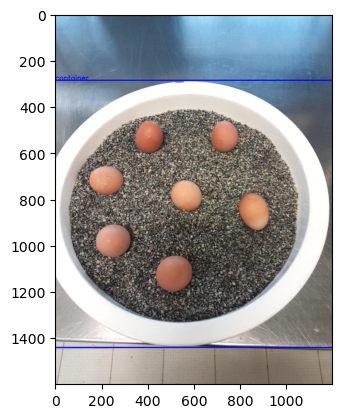

In [8]:
import matplotlib.pyplot as plt
plt.imshow(img_bb)
plt.show()